In [49]:
# Playspace Visualization
# Analyzes a .echoreplay clip to see how much playspace abuse there is
# - NtsFranz

In [50]:
replays_folder = r"C:\Users\Anton\Documents\Spark\replays"
filename = 'clip_2021-04-07_21-25-16_NtsFranz_abuse.echoreplay'

In [51]:
# Imports a replay file
import zipfile
import os
import sys
import tempfile
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
fmt = r'%Y/%m/%d %H:%M:%S.%f'

# extracts the JSON object and the timestamp from a .echoreplay line
def get_frame(line: str):
    timestamp, jsondata = line.split("\t")
    return datetime.datetime.strptime(timestamp, fmt), json.loads(jsondata)


# finds the player object with the given name or returns None
def get_player(json: str, player_name: str):
    for team in json['teams']:
        if 'players' in team:
            for player in team['players']:
                if player['name'] == player_name:
                    player['game_clock'] = json['game_clock']
                    return player
    return None

# exctract the .echoreplay file
data = []
filepath = os.path.join(replays_folder, filename)
if zipfile.is_zipfile(filepath):
    # Unzip
    with zipfile.ZipFile(filepath, 'r') as zf:
        with tempfile.TemporaryDirectory() as td:
            zf.extractall(td)
            for entry in os.scandir(td):
                with open(entry.path, 'r') as f:
                    data.extend(f.readlines())
else:
    with open(filepath) as f:
        data.extend(f.readlines())

print("Loaded file into memory ({0} lines)".format(len(data)))

Loaded file into memory (442 lines)


In [52]:
xyz=['x','y','z']
# converts the list of raw replay lines to a list of frames
frames = [get_frame(line)[1] for line in data if len(line) > 800]
print("Loaded JSON frames...")

# adds x,y,z of local player position to the list and puts into a dict to load into dataframe
players = [{xyz[i]: frame['player']['vr_position'][i] for i in range(0, 3)}|frame for frame in frames]
rawDF = pd.DataFrame(players)
display(rawDF.head())

Loaded JSON frames...


,x,y,z,blue_points,last_throw,disc,sessionid,orange_team_restart_request,sessionip,game_status,...,orange_points,player,private_match,pause,possession,tournament_match,blue_team_restart_request,client_name,last_score,teams
0,-0.244,-0.063,-0.396,11,"{'arm_speed': 11.40594, 'total_speed': 13.4516...","{'position': [14.384001, 2.3890002, -5.6510005...",E762CF8E-0AD6-4EE7-BEE9-992A15A9A0A5,0,108.178.18.214,playing,...,4,"{'vr_left': [-0.73700005, -0.16500001, -0.6550...",True,"{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,"{'disc_speed': 8.9754601, 'team': 'blue', 'goa...","[{'players': [{'name': 'Lolz-', 'rhand': {'pos..."
1,-0.242,-0.068,-0.406,11,"{'arm_speed': 11.40594, 'total_speed': 13.4516...","{'position': [14.353001, 2.3830001, -5.6700001...",E762CF8E-0AD6-4EE7-BEE9-992A15A9A0A5,0,108.178.18.214,playing,...,4,"{'vr_left': [-0.76700002, -0.16100001, -0.6210...",True,"{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,"{'disc_speed': 8.9754601, 'team': 'blue', 'goa...","[{'players': [{'name': 'Lolz-', 'rhand': {'pos..."
2,-0.235,-0.070,-0.419,11,"{'arm_speed': 11.40594, 'total_speed': 13.4516...","{'position': [14.295001, 2.3720002, -5.7040005...",E762CF8E-0AD6-4EE7-BEE9-992A15A9A0A5,0,108.178.18.214,playing,...,4,"{'vr_left': [-0.83500004, -0.17900001, -0.5200...",True,"{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,"{'disc_speed': 8.9754601, 'team': 'blue', 'goa...","[{'players': [{'name': 'Lolz-', 'rhand': {'pos..."
3,-0.232,-0.069,-0.422,11,"{'arm_speed': 11.40594, 'total_speed': 13.4516...","{'position': [14.265, 2.3660002, -5.723], 'for...",E762CF8E-0AD6-4EE7-BEE9-992A15A9A0A5,0,108.178.18.214,playing,...,4,"{'vr_left': [-0.86500007, -0.18300001, -0.4680...",True,"{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,"{'disc_speed': 8.9754601, 'team': 'blue', 'goa...","[{'players': [{'name': 'Lolz-', 'rhand': {'pos..."
4,-0.228,-0.065,-0.425,11,"{'arm_speed': 11.40594, 'total_speed': 13.4516...","{'position': [14.201, 2.352, -5.7600002], 'for...",E762CF8E-0AD6-4EE7-BEE9-992A15A9A0A5,0,108.178.18.214,playing,...,4,"{'vr_left': [-0.88600004, -0.19700001, -0.4200...",True,"{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,"{'disc_speed': 8.9754601, 'team': 'blue', 'goa...","[{'players': [{'name': 'Lolz-', 'rhand': {'pos..."


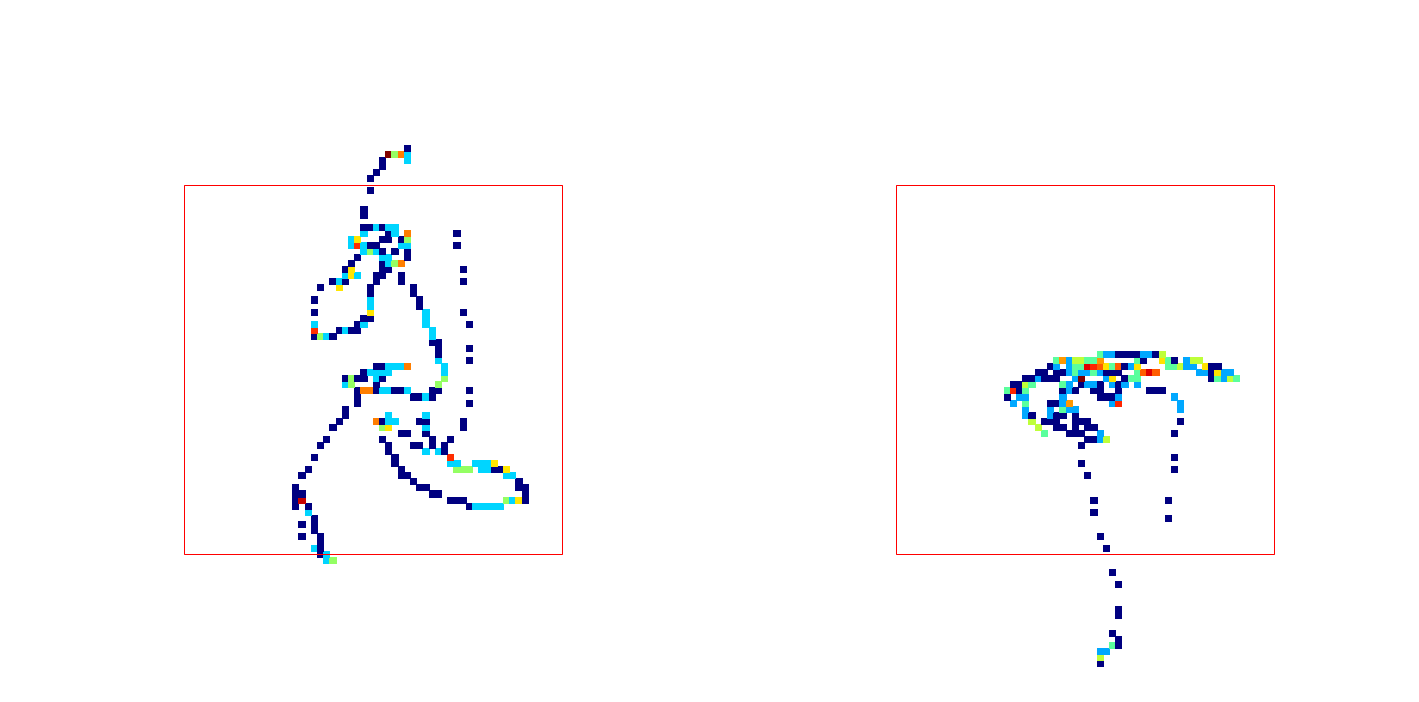

In [55]:
# graph the positions in a heatmap
from matplotlib import colors
import matplotlib.patches as patches

colormap='jet'
figscale=1
r=1
plt.rcParams.update({'font.size': 16})
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "text.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

df = rawDF

fig, (ax1,ax2) = plt.subplots(1, 2, tight_layout=True,figsize=(20*figscale, 10*figscale))
fig.patch.set_visible(False)
# ax.axis('off')
hist = ax1.hist2d(df['x'], df['z'], 
        bins=(100,100), 
        range=[[-r,r],[-r,r]], 
        norm=colors.LogNorm(), cmap=colormap)

hist = ax2.hist2d(df['x'], df['y'], 
        bins=(100,100), 
        range=[[-r,r],[-r,r]], 
        norm=colors.LogNorm(), cmap=colormap)

# ft to meters conversion
fourFT = 1.2192
rect1 = patches.Rectangle((-fourFT/2, -fourFT/2),fourFT,fourFT,linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((-fourFT/2, -fourFT/2),fourFT,fourFT,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax1.add_patch(rect1)
ax2.add_patch(rect2)
# plt.axis('off')
# plt.show()

fig.suptitle('2D Histogram of playspace positions. Red box is 4ftx4ft.')
ax1.set_title('Top View')
ax2.set_title('Side View')

plt.savefig('playspace_top_side.png', transparent=True)